In [2]:
#importing the Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras


In [3]:
train = 'C:/Users\prash\Assignment6_datasets/seg_train/'
test = 'C:/Users\prash\Assignment6_datasets/seg_test/'
pred = 'C:/Users\prash\Assignment6_datasets/seg_pred/'

In [6]:
for folder in  os.listdir(train+ 'seg_train') : 
    files = gb.glob(pathname= str( train+'seg_train//' + folder + '/*.jpg'))
    print(f'training dataset , which is  {len(files)} in folder {folder}')

training dataset , which is  2191 in folder buildings
training dataset , which is  2271 in folder forest
training dataset , which is  2404 in folder glacier
training dataset , which is  2512 in folder mountain
training dataset , which is  2274 in folder sea
training dataset , which is  2382 in folder street


In [7]:
for folder in  os.listdir(test+'seg_test') : 
    files = gb.glob(pathname= str( test+'seg_test//' + folder + '/*.jpg'))
    print(f'training dataset , which is {len(files)} in folder {folder}')

training dataset , which is 437 in folder buildings
training dataset , which is 474 in folder forest
training dataset , which is 553 in folder glacier
training dataset , which is 525 in folder mountain
training dataset , which is 510 in folder sea
training dataset , which is 501 in folder street


In [8]:
files = gb.glob(pathname= str(pred +'seg_pred/*.jpg'))
print(f'training dataset , which is {len(files)}')

training dataset , which is 7301


In [9]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x  

In [10]:
size = []
for folder in  os.listdir(train+'seg_train') : 
    files = gb.glob(pathname = str(train+'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(146, 150, 3)        2
(136, 150, 3)        2
(144, 150, 3)        2
(134, 150, 3)        2
(108, 150, 3)        2
(123, 150, 3)        2
(143, 150, 3)        2
(142, 150, 3)        2
(133, 150, 3)        1
(145, 150, 3)        1
(76, 150, 3)         1
(147, 150, 3)        1
(119, 150, 3)        1
(102, 150, 3)        1
(105, 150, 3)        1
(110, 150, 3)        1
(120, 150, 3)        1
(100, 150, 3)        1
(131, 150, 3)        1
(103, 150, 3)        1
(97, 150, 3)         1
(149, 150, 3)        1
(141, 150, 3)        1
(140, 150, 3)        1
(124, 150, 3)        1
(115, 150, 3)        1
(81, 150, 3)         1
dtype: int64

In [11]:
size = []
for folder in  os.listdir(test +'seg_test') : 
    files = gb.glob(pathname= str( test+'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(141, 150, 3)       1
(110, 150, 3)       1
(149, 150, 3)       1
(131, 150, 3)       1
(72, 150, 3)        1
(76, 150, 3)        1
(81, 150, 3)        1
dtype: int64

In [12]:
size = []
files = gb.glob(pathname= str(pred +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(100, 150, 3)       1
(112, 150, 3)       1
(129, 150, 3)       1
(139, 150, 3)       1
(126, 150, 3)       1
(374, 500, 3)       1
(143, 150, 3)       1
(124, 150, 3)       1
(149, 150, 3)       1
(144, 150, 3)       1
(131, 150, 3)       1
(133, 150, 3)       1
(108, 150, 3)       1
dtype: int64

In [13]:
s = 100
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [14]:
X_train = []
y_train = []
for folder in  os.listdir(train+'seg_train') : 
    files = gb.glob(pathname= str( train+'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [16]:
print(f'Here, we have {len(X_train)} items in training')

Here, we have 14034 items in training


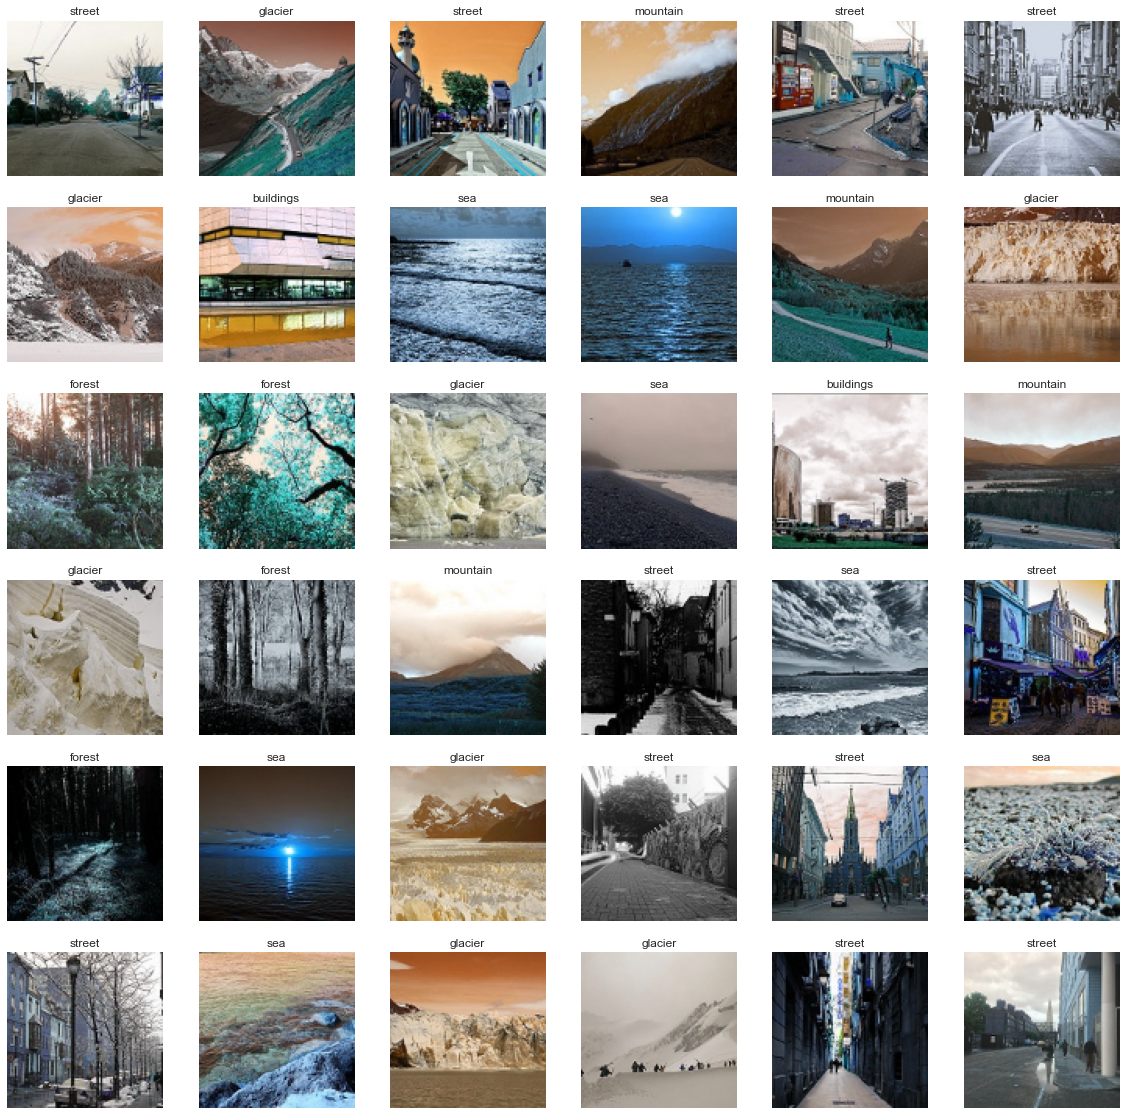

In [17]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [18]:
X_test = []
y_test = []
for folder in  os.listdir(test+'seg_test') : 
    files = gb.glob(pathname= str(test+ 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [20]:
print(f'Here, we have {len(X_test)} items in test')

Here, we have 3000 items in test


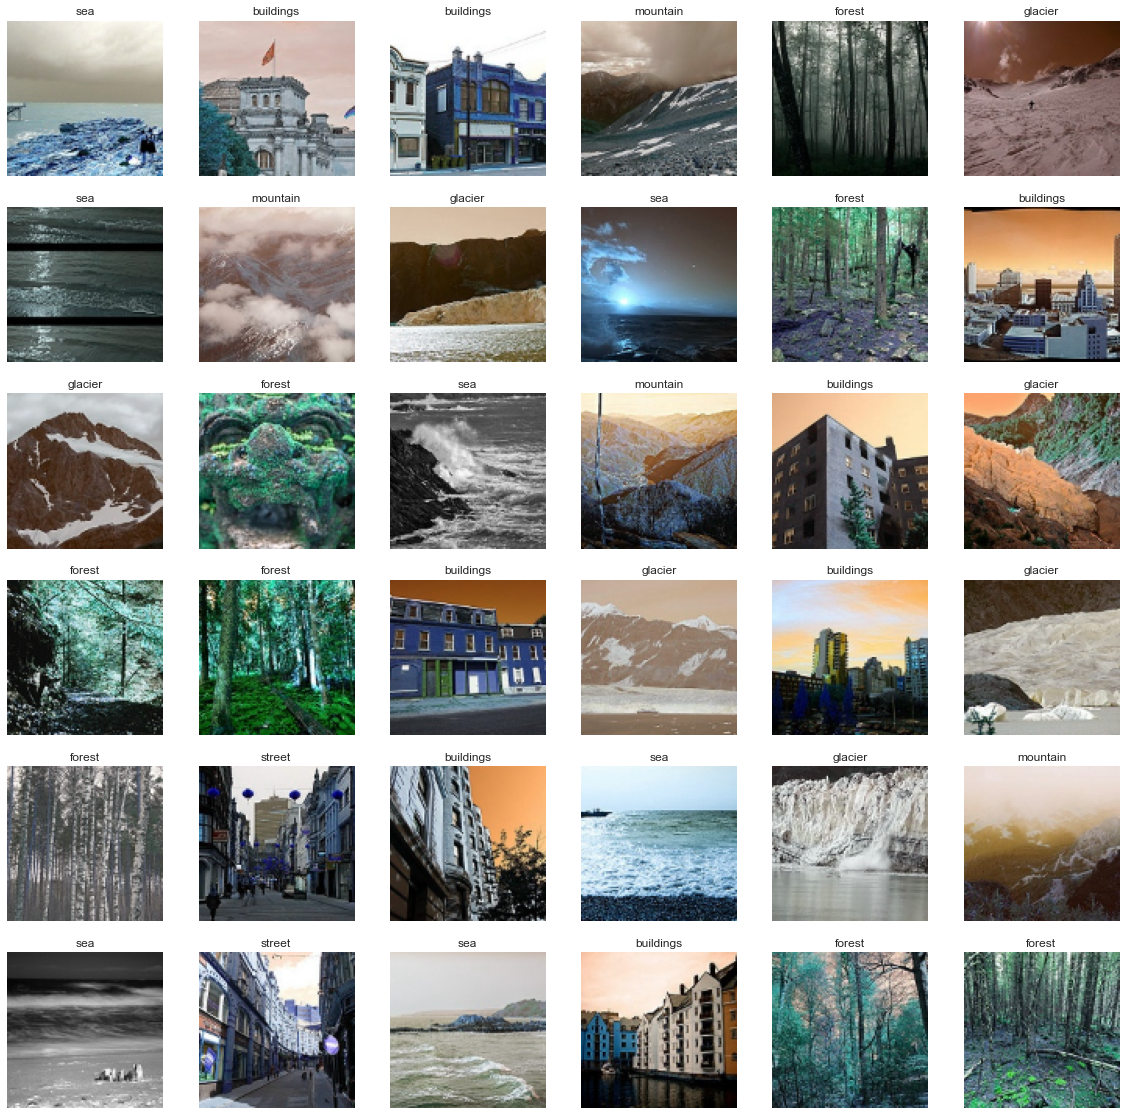

In [21]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [22]:
X_pred = []
files = gb.glob(pathname= str(pred + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array)) 

In [23]:
print(f'Here, we have {len(X_pred)} items in prediction')

Here, we have 7301 items in prediction


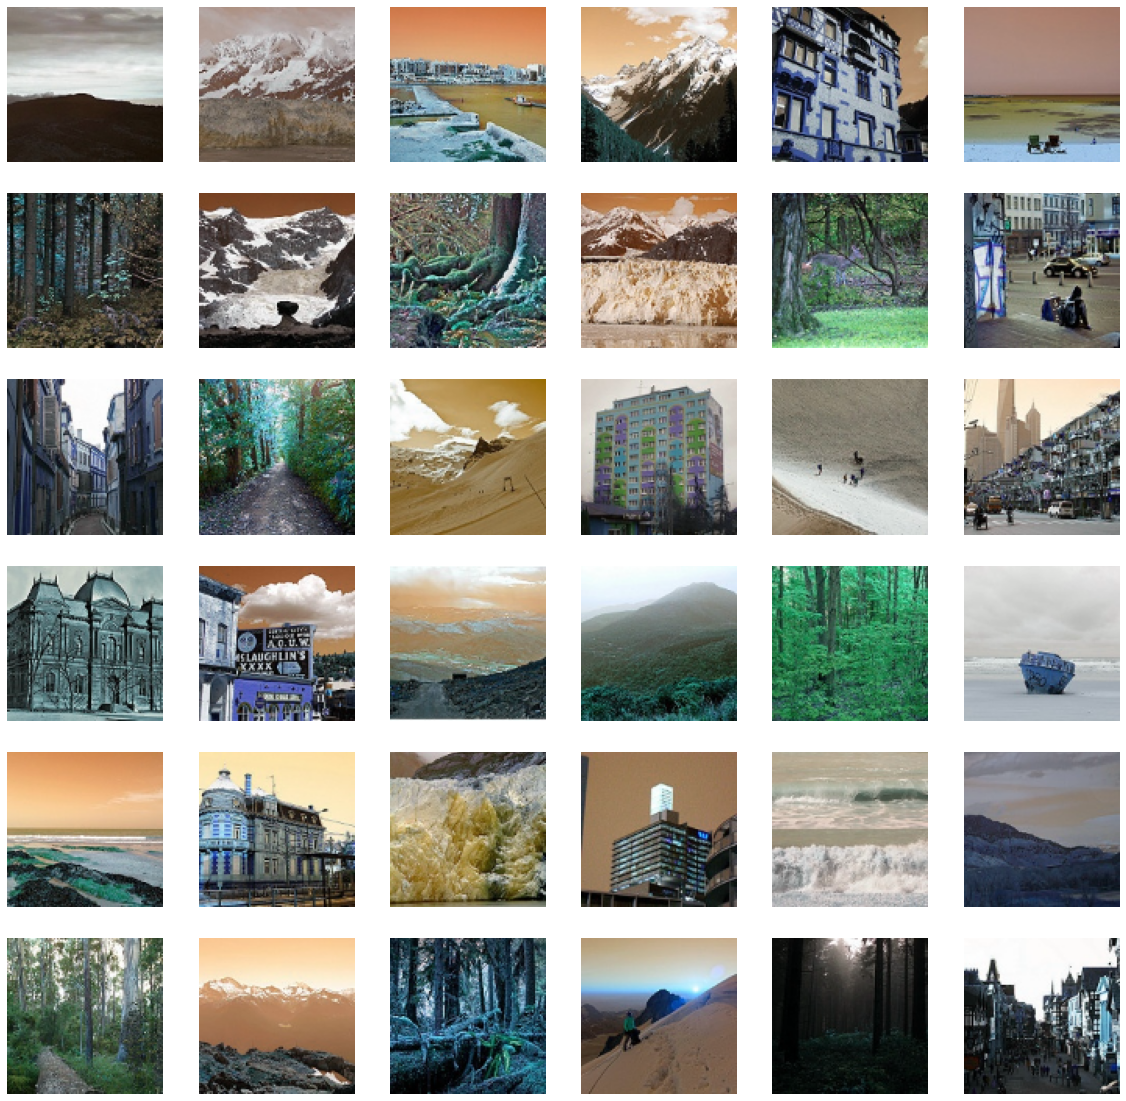

In [24]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [25]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'shape for x_train  is {X_train.shape}')
print(f'shape for X_test is {X_test.shape}')
print(f'shape for pred is {X_pred_array.shape}')
print(f'shape for y_train is {y_train.shape}')
print(f'shape for y_test is {y_test.shape}')

shape for x_train  is (14034, 100, 100, 3)
shape for X_test is (3000, 100, 100, 3)
shape for pred is (7301, 100, 100, 3)
shape for y_train is (14034,)
shape for y_test is (3000,)


In [26]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

In [27]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None,

In [78]:
epochs = 2
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/2
220/220 [==============================] - 1761s 8s/step - loss: 1.0437 - accuracy: 0.5879
Epoch 2/2
220/220 [==============================] - 1743s 8s/step - loss: 0.9033 - accuracy: 0.6683


In [79]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

94/94 [==============================] - 124s 1s/step - loss: 0.8259 - accuracy: 0.6890
Test Loss is 0.8258852362632751
Test Accuracy is 0.6890000104904175


In [80]:
predict = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(predict.shape))

Prediction Shape is (3000, 6)


In [81]:
results = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(results.shape))

Prediction Shape is (7301, 6)


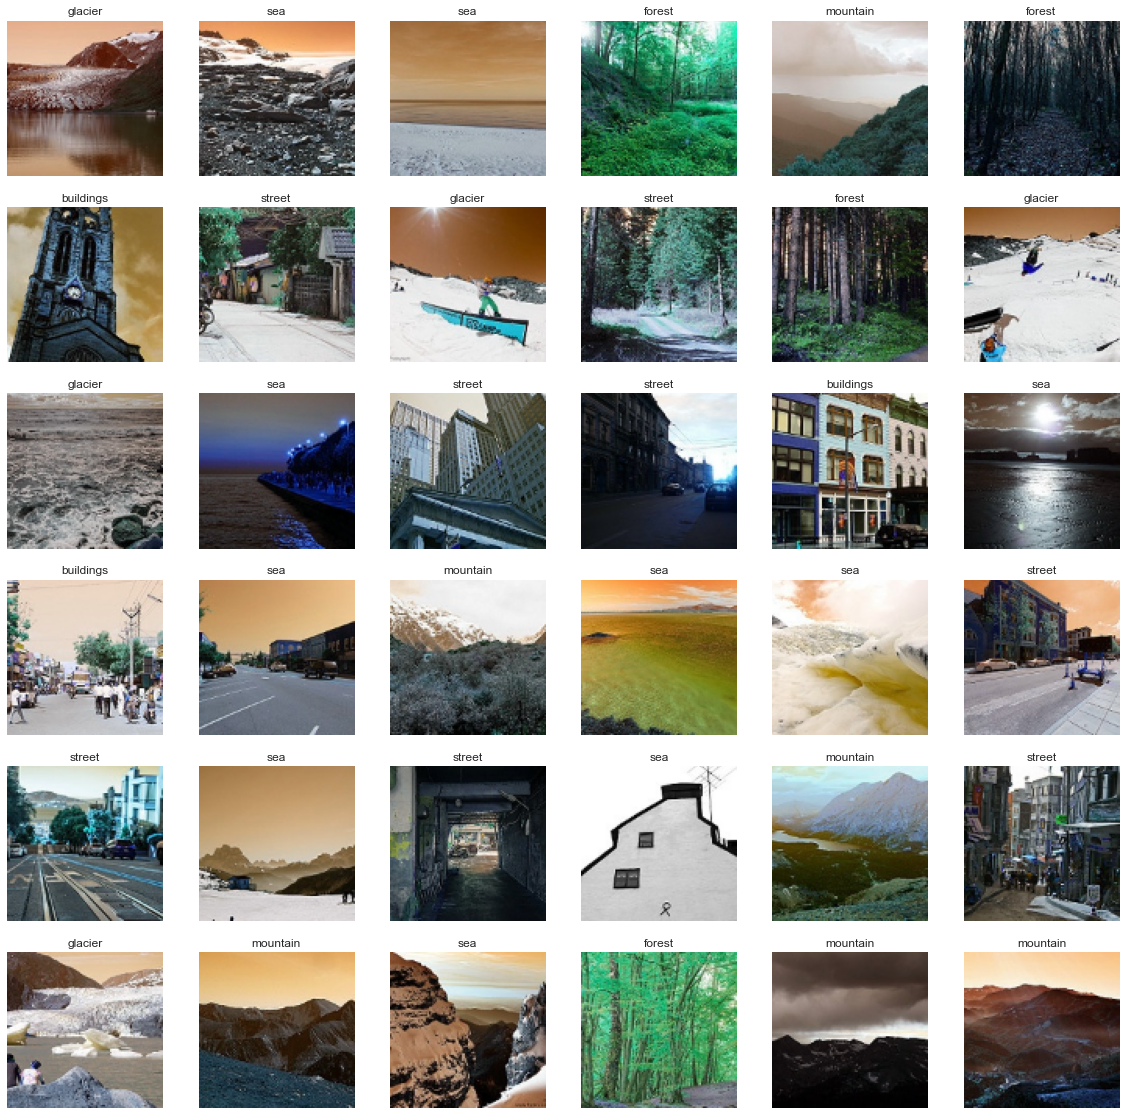

In [83]:
plt.figure(figsize=(20,20))

for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(results[i])))